In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\abhis\\Downloads\\emails.csv")

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [9]:
x = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

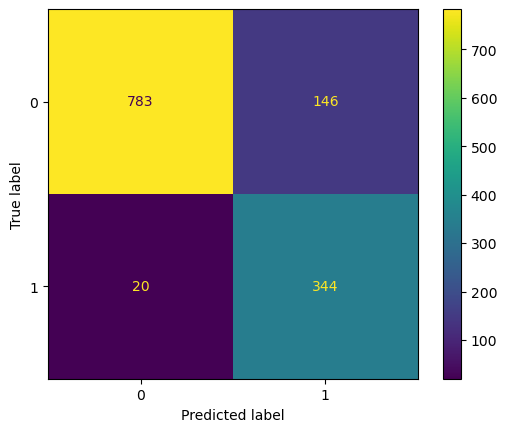

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [16]:
accuracy_score(y_test, y_pred)

0.871616395978345

In [17]:
errors = []
import numpy as nm
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    errors.append(nm.mean(pred != y_test))

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)


0.9767981438515081